In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

## The size of the domain is given as an input

In [86]:
### First the case of single layer is considered ###
# 2D grid
X = 100
Y = 100
grid = np.zeros((X,Y))

# Number of transistors given
N = 4

# For each transistor, the number of pins as well as their positions are given
# It is assumed that the transistor are points
PINS = 2
POS = [(10,10), (50,20), (40,70), (80,90)]
# Connections between transistors
connections = [(1,3),(2,4),(3,4)]


In [89]:
POS = []
for i in range(N):
    POS.append((random.randrange(X),random.randrange(Y)))

In [50]:
POS

[(66, 50), (6, 68), (44, 64), (22, 95)]

A function is defined which places the transistor on the grid and traces vertical and horizontal wires which connect the transistors

In [83]:
def Tracing(POS,connections,grid):
# Function Tracing takes as arguments the positions and connections of the transistors 
# as well as the grid of the allowed domain

### Placing the transistors on the grid ###
    for i in range(len(POS)):
        grid[POS[i]] = 1
    Grid = grid.copy()
### Tracing the connections ###
    for i in range(len(connections)):
        t1 = connections[i][0]
        t2 = connections[i][1]
        diff = (POS[t2-1][0] - POS[t1-1][0])
        if diff < 0:
            range_toiter =  range(diff+1,0,1)[::-1]
        else:
            range_toiter =  range(1,diff,1)
        for j in range_toiter:
#             if Grid[POS[t1-1][0]+j,POS[t1-1][1]] == 0:
            Grid[POS[t1-1][0]+j,POS[t1-1][1]] += 0.4
#             else: 
#                 break
        diff = (POS[t2-1][1] - POS[t1-1][1])
        if diff < 0:
            range_toiter = range(diff+1,0,1)[::-1]
        else:
            range_toiter = range(0,diff,1)
        for j in range_toiter:
#             if Grid[POS[t2-1][0],POS[t1-1][1]+j] == 0:
            Grid[POS[t2-1][0],POS[t1-1][1]+j] += 0.4
#             else:
#                 break
    return Grid, grid    

In [91]:
Grid,grid1 = Tracing(POS,connections,grid)

The function Tracing is running in N + M*(X+Y)  where M is the number of connections. 

Possible drawback is that the function beggins by tracing first the vertical wires and then the horizontal and that the wires can overlapp. The overlap can be seen as a yellow line.

This procedure could be repeated to minimize the total wirelength by deleting the overlapping wires, as well as chosing which part to trace first (horizontal or vertical) in order to have as much as possible overlapping wires. This is the case since afterwards these parts will be deleted.

In [5]:
# Finding the shortest path length of the connection between two transistors
t1 = connections[1][0]
t2 = connections[1][1]
# the shortest length is simply the euclidean distance 
length = np.sqrt((POS[t1-1][0]-POS[t2-1][0])**2 + (POS[t1-1][1]-POS[t2-1][1])**2)
length


76.15773105863909

In [124]:
# tracing line on the grid between two transistors
for i in range((POS[t2-1][0]-POS[t1-1][0])):
    grid[POS[t1-1][0]+i,POS[t1-1][1]] = 1
    print(i)
for i in range((POS[t2-1][1]-POS[t1-1][1])):
    grid[POS[t2-1][0],POS[t1-1][1]+i] = 1
# total length of wire
d = abs(POS[t2-1][0]-POS[t1-1][0]) + abs(POS[t2-1][1]-POS[t1-1][1])

Text(0.5, 1.0, 'Routing of the wires for single layer')

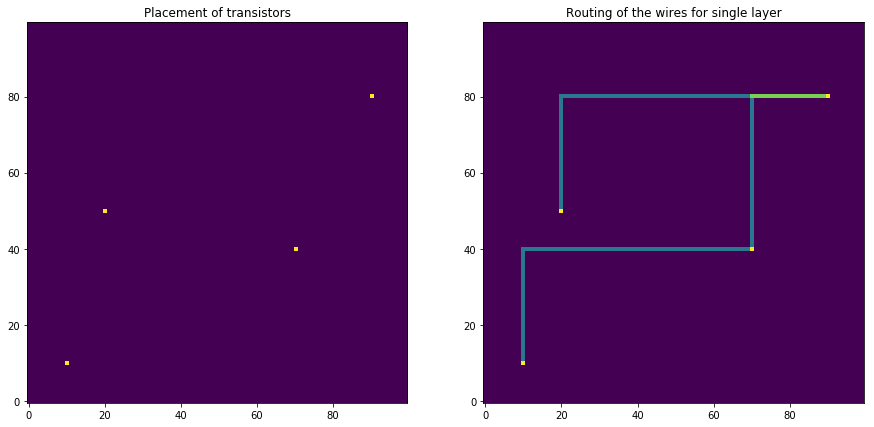

In [90]:
### Plotting the results ###
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(grid1,origin='lower')
ax[0].set_title('Placement of transistors')
ax[1].imshow(Grid,origin='lower')
ax[1].set_title('Routing of the wires for single layer')